In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("/content/drive/MyDrive/Bank Management System/Loan Risk/LoansGoodBad.csv")

In [4]:
df.head()

,RowID,Loan_Amount,Term,Interest_Rate,Employment_Years,Home_Ownership,Annual_Income,Verification_Status,Loan_Purpose,State,Debt_to_Income,Delinquent_2yr,Revolving_Cr_Util,Total_Accounts,Bad_Loan,Longest_Credit_Length
0,1,5000.0,36 months,10.65,10.0,RENT,24000.0,VERIFIED - income,credit_card,AZ,27.65,0.0,83.7,9.0,GOOD,26.0
1,2,2500.0,60 months,15.27,0.5,RENT,30000.0,VERIFIED - income source,car,GA,1.00,0.0,9.4,4.0,BAD,12.0
2,3,2400.0,36 months,15.96,10.0,RENT,12252.0,not verified,small_business,IL,8.72,0.0,98.5,10.0,GOOD,10.0
3,4,10000.0,36 months,13.49,10.0,RENT,49200.0,VERIFIED - income source,other,CA,20.00,0.0,21.0,37.0,GOOD,15.0
4,5,5000.0,36 months,7.90,3.0,RENT,36000.0,VERIFIED - income source,wedding,AZ,11.20,0.0,28.3,12.0,GOOD,7.0


In [5]:
df1= df.drop(['RowID', 'State'], axis= 1)

In [6]:
df1.shape

(163994, 14)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163994 entries, 0 to 163993
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_Amount            163987 non-null  float64
 1   Term                   163987 non-null  object 
 2   Interest_Rate          163987 non-null  float64
 3   Employment_Years       158183 non-null  float64
 4   Home_Ownership         163987 non-null  object 
 5   Annual_Income          163983 non-null  float64
 6   Verification_Status    163987 non-null  object 
 7   Loan_Purpose           163987 non-null  object 
 8   Debt_to_Income         163987 non-null  float64
 9   Delinquent_2yr         163958 non-null  float64
 10  Revolving_Cr_Util      163794 non-null  float64
 11  Total_Accounts         163958 non-null  float64
 12  Bad_Loan               163994 non-null  object 
 13  Longest_Credit_Length  163958 non-null  float64
dtypes: float64(9), object(5)
memory usag

In [8]:
df1.nunique()

Loan_Amount               1274
Term                         2
Interest_Rate              512
Employment_Years            11
Home_Ownership               6
Annual_Income            14112
Verification_Status          3
Loan_Purpose                14
Debt_to_Income            3735
Delinquent_2yr              19
Revolving_Cr_Util         1170
Total_Accounts              96
Bad_Loan                     2
Longest_Credit_Length       63
dtype: int64

In [9]:
box_plot= df1[['Loan_Amount', 'Interest_Rate', 'Annual_Income', 'Debt_to_Income', 'Revolving_Cr_Util', 
              'Total_Accounts', 'Longest_Credit_Length']]
bar_plot= df1[['Term', 'Employment_Years', 'Home_Ownership', 'Verification_Status', 'Loan_Purpose', 'Delinquent_2yr',
              'Bad_Loan']]

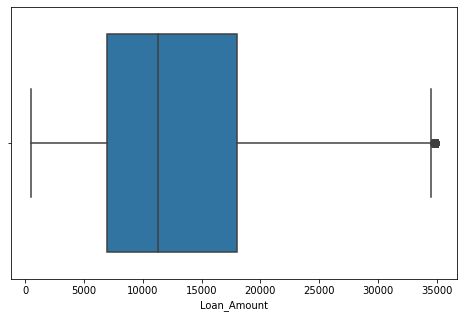

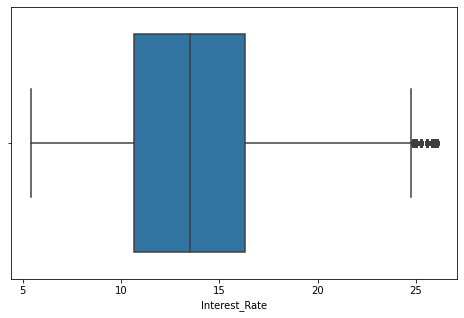

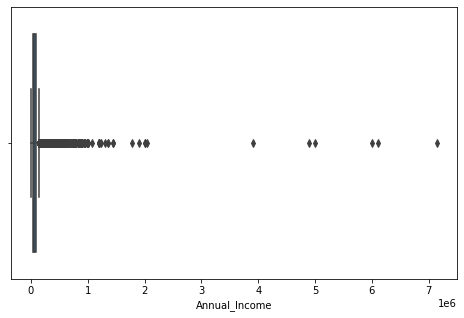

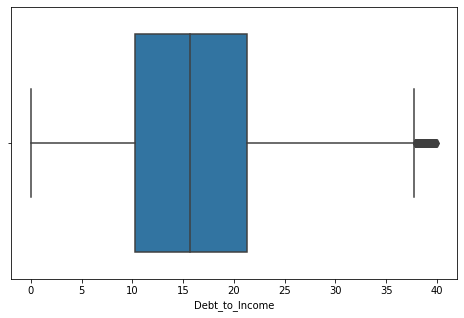

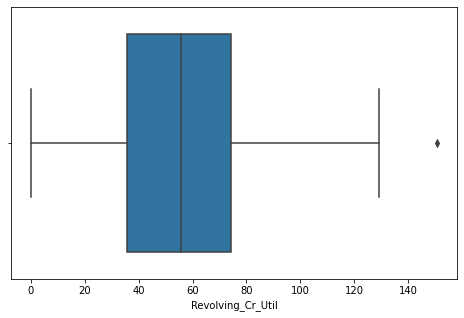

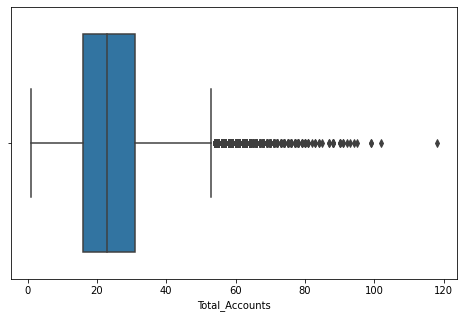

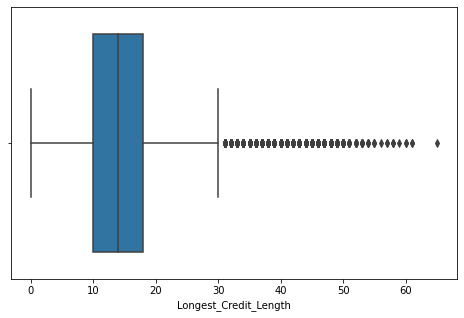

In [10]:
for i in box_plot.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=i, data=df)
    plt.show()

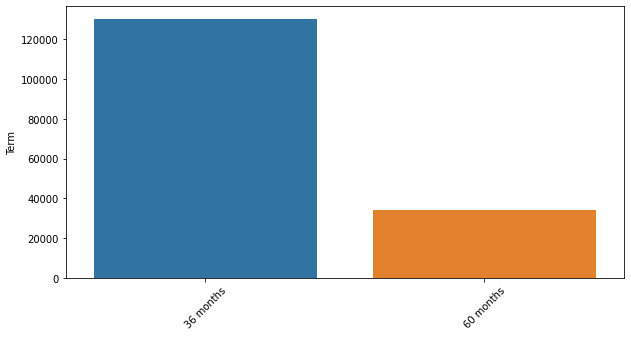

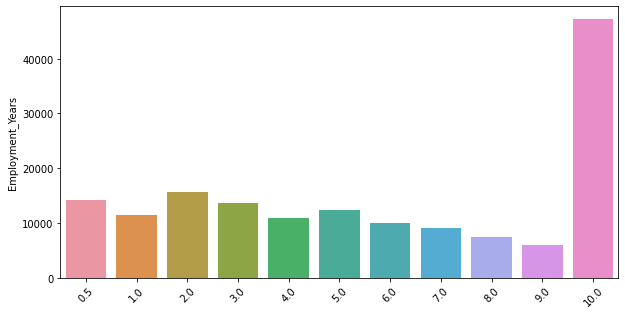

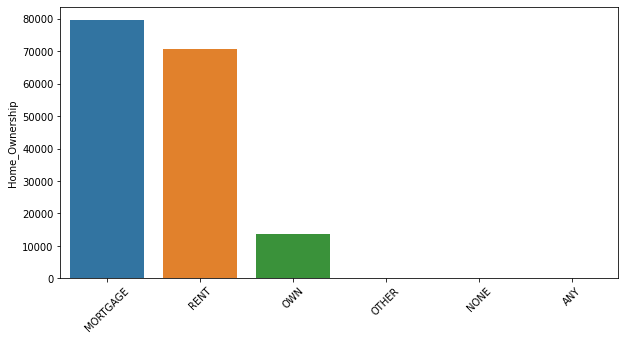

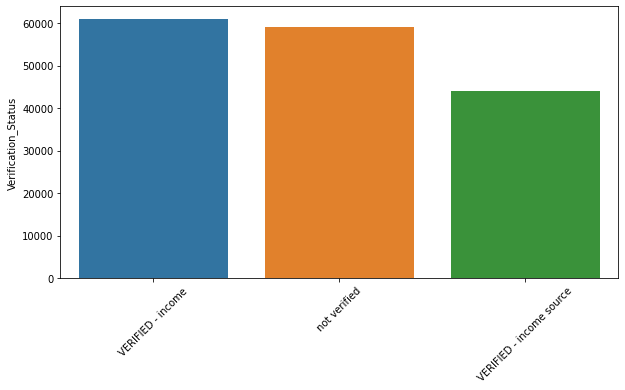

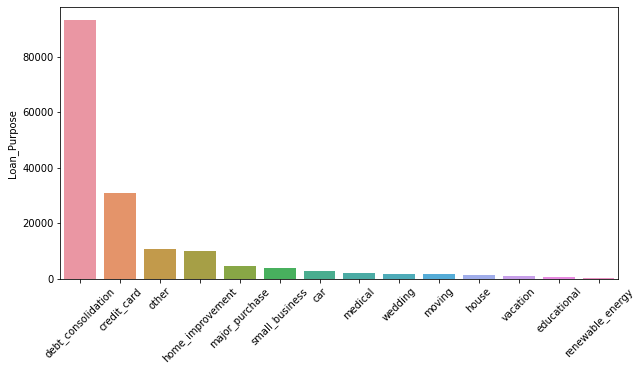

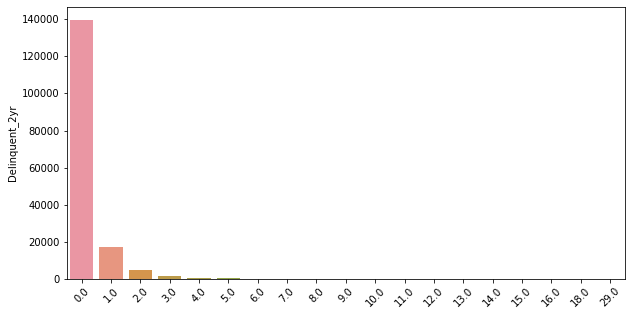

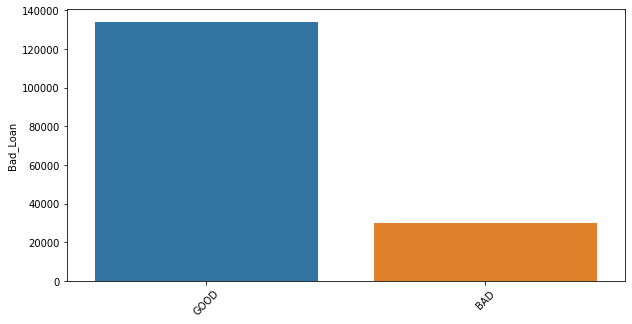

In [11]:
for i in bar_plot.columns:
    plt.figure(figsize=(10,5))
    cat_num = df[i].value_counts()
    sns.barplot(x=cat_num.index, y=cat_num)
    plt.xticks(rotation=45)
    plt.show()

In [12]:
df1['Term']= df1['Term'].str.rstrip(' months')

In [13]:
df1.Home_Ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', nan, 'ANY'],
      dtype=object)

In [14]:
ownership= {'RENT': 'Rent', 'OWN': 'Own', 'MORTGAGE': 'Own', 'OTHER': 'Other', 'NONE': 'Other', 
            np.nan: 'Other', 'ANY': 'Other'}

df1['Home_Ownership']= df1['Home_Ownership'].map(ownership)

In [15]:
ownership1= pd.get_dummies(df1.Home_Ownership)
df1= pd.concat([df1, ownership1], axis= 1)
df1= df1.drop('Home_Ownership', axis= 1)

In [16]:
df1.Verification_Status.unique()

array(['VERIFIED - income', 'VERIFIED - income source', 'not verified',
       nan], dtype=object)

In [17]:
verification= {'VERIFIED - income' :1, 'VERIFIED - income source' :1, 'not verified' :0,
       np.nan :0}
df1['Verification_Status']= df1['Verification_Status'].map(verification)

In [18]:
df1.Loan_Purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational', nan], dtype=object)

In [19]:
df1.Loan_Purpose.replace(np.nan, 'other', inplace= True)

In [20]:
purpose= pd.get_dummies(df1.Loan_Purpose)
df1= pd.concat([df1, purpose], axis= 1)
df1= df1.drop('Loan_Purpose', axis= 1)

In [21]:
df1.Bad_Loan.unique()

array(['GOOD', 'BAD'], dtype=object)

In [22]:
loan= {'GOOD' :1, 'BAD' :0}
df1['Bad_Loan']= df1['Bad_Loan'].map(loan)

In [23]:
df1.head()

,Loan_Amount,Term,Interest_Rate,Employment_Years,Annual_Income,Verification_Status,Debt_to_Income,Delinquent_2yr,Revolving_Cr_Util,Total_Accounts,Bad_Loan,Longest_Credit_Length,Other,Own,Rent,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,5000.0,36,10.65,10.0,24000.0,1,27.65,0.0,83.7,9.0,1,26.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,60,15.27,0.5,30000.0,1,1.00,0.0,9.4,4.0,0,12.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,36,15.96,10.0,12252.0,0,8.72,0.0,98.5,10.0,1,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000.0,36,13.49,10.0,49200.0,1,20.00,0.0,21.0,37.0,1,15.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5000.0,36,7.90,3.0,36000.0,1,11.20,0.0,28.3,12.0,1,7.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [24]:
df1.isnull().sum()

Loan_Amount                 7
Term                        7
Interest_Rate               7
Employment_Years         5811
Annual_Income              11
Verification_Status         0
Debt_to_Income              7
Delinquent_2yr             36
Revolving_Cr_Util         200
Total_Accounts             36
Bad_Loan                    0
Longest_Credit_Length      36
Other                       0
Own                         0
Rent                        0
car                         0
credit_card                 0
debt_consolidation          0
educational                 0
home_improvement            0
house                       0
major_purchase              0
medical                     0
moving                      0
other                       0
renewable_energy            0
small_business              0
vacation                    0
wedding                     0
dtype: int64

In [25]:
df1.dropna(axis=0, inplace= True)

In [26]:
# train test split

In [27]:
X= df1.drop('Bad_Loan', axis=1)
y= df1.Bad_Loan

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 10, stratify= y)

In [30]:
#Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler= StandardScaler()

In [33]:
X_train= scaler.fit_transform(X_train)
#X_test= scaler.fit(X_test)

### Model 1 Logistic regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model_1= LogisticRegression(random_state= 10, class_weight= 'balanced', max_iter= 1000)
model_1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
train_pred1= model_1.predict(X_train)
test_pred1= model_1.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score, classification_report

In [38]:
actual = y_train
predicted = train_pred1
print('Train Report : ')
print(classification_report(actual, predicted))

Train Report : 
              precision    recall  f1-score   support

           0       0.29      0.64      0.39     22761
           1       0.89      0.65      0.75    103635

    accuracy                           0.65    126396
   macro avg       0.59      0.64      0.57    126396
weighted avg       0.78      0.65      0.69    126396



In [39]:
actual = y_test
predicted = test_pred1
print('Test Report : ')
print(classification_report(actual, predicted))

Test Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5690
           1       0.82      1.00      0.90     25910

    accuracy                           0.82     31600
   macro avg       0.41      0.50      0.45     31600
weighted avg       0.67      0.82      0.74     31600



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Model 2 KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
model_2= KNeighborsClassifier()
model_2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [45]:
train_pred2= model_2.predict(X_train)
test_pred2= model_2.predict(X_test)

In [46]:
actual = y_train
predicted = train_pred2
print('Train Report : ')
print(classification_report(actual, predicted))

Train Report : 
              precision    recall  f1-score   support

           0       0.66      0.26      0.37     22761
           1       0.86      0.97      0.91    103635

    accuracy                           0.84    126396
   macro avg       0.76      0.61      0.64    126396
weighted avg       0.82      0.84      0.81    126396



In [47]:
actual = y_test
predicted = test_pred2
print('Test Report : ')
print(classification_report(actual, predicted))

Test Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5690
           1       0.82      1.00      0.90     25910

    accuracy                           0.82     31600
   macro avg       0.41      0.50      0.45     31600
weighted avg       0.67      0.82      0.74     31600



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Model 3 Random Forest Classifier

In [48]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 10)

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
model_3= RandomForestClassifier()
model_3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
train_pred3= model_3.predict(X_train)
test_pred3= model_3.predict(X_test)

In [52]:
actual = y_train
predicted = train_pred3
print('Train Report : ')
print(classification_report(actual, predicted))

Train Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22832
           1       1.00      1.00      1.00    103564

    accuracy                           1.00    126396
   macro avg       1.00      1.00      1.00    126396
weighted avg       1.00      1.00      1.00    126396



In [53]:
actual = y_test
predicted = test_pred3
print('Test Report : ')
print(classification_report(actual, predicted))

Test Report : 
              precision    recall  f1-score   support

           0       0.50      0.05      0.09      5619
           1       0.83      0.99      0.90     25981

    accuracy                           0.82     31600
   macro avg       0.66      0.52      0.49     31600
weighted avg       0.77      0.82      0.76     31600



In [54]:
model_3.feature_importances_

array([0.10794034, 0.01666676, 0.13899   , 0.06301484, 0.11897753,
       0.01294544, 0.1323498 , 0.02057525, 0.12908218, 0.09960133,
       0.09137372, 0.00048982, 0.00724771, 0.00709354, 0.00237438,
       0.00823377, 0.01142653, 0.00088988, 0.00521815, 0.00203567,
       0.00330794, 0.00259868, 0.00205552, 0.00623913, 0.00056574,
       0.00523805, 0.00149315, 0.00197515])

### Model 4 Gradiant Boosting Classifier

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
model_4= GradientBoostingClassifier()
model_4.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [57]:
train_pred4= model_4.predict(X_train)
test_pred4= model_4.predict(X_test)

In [58]:
actual = y_train
predicted = train_pred4
print('Train Report : ')
print(classification_report(actual, predicted))

Train Report : 
              precision    recall  f1-score   support

           0       0.58      0.03      0.05     22832
           1       0.82      1.00      0.90    103564

    accuracy                           0.82    126396
   macro avg       0.70      0.51      0.48    126396
weighted avg       0.78      0.82      0.75    126396



In [59]:
actual = y_test
predicted = test_pred4
print('Test Report : ')
print(classification_report(actual, predicted))

Test Report : 
              precision    recall  f1-score   support

           0       0.54      0.03      0.05      5619
           1       0.83      1.00      0.90     25981

    accuracy                           0.82     31600
   macro avg       0.68      0.51      0.48     31600
weighted avg       0.78      0.82      0.75     31600

